![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Projetores e Refletores

## Questão 1: Projeção ortogonal

Escreva uma função `proj(v)` que retorna **uma função**
que calcula a projeção ortogonal de um vetor qualquer $u$  em $v$.

In [2]:
def proj(v):
    vv = np.asarray(v)
    def aux(u):
        uu = np.asarray(u)
        return  np.sum(uu * vv)/np.sum(vv * vv) * vv
    return aux

In [3]:
f2 = proj([0,1])
assert np.allclose(f2([0,2]), [0,2])
assert np.allclose(f2([1,0]), [0,0])

In [4]:
f3 = proj([0,1,2])
assert np.allclose(f3([0,1,1]), [0, 0.6, 1.2])
assert np.allclose(f3([2,1,0]), [0, 0.2, 0.4])

In [5]:
fbig = proj([1,1,-2,3,-1,2])
assert np.allclose(4*fbig([1,1,1,1,0,1]), [1,1,-2,3,-1,2])

## Questão 2: Matriz da projeção

Escreva uma função `matr_proj(v)` que calcula a matriz de projeção no vetor $v$.

In [6]:
def matr_proj(v):
    vv = np.asarray(v)
    ratio = np.sum(vv * vv)
    base_matrix =  np.array([i * vv for i in vv])
    return base_matrix / ratio

In [7]:
M2 = matr_proj([1,2])
assert np.allclose(M2, [[0.2, 0.4], [0.4, 0.8]])

In [8]:
M5 = matr_proj([1,2,0,-3,1])
assert np.shape(M5) == (5,5)
assert abs(M5[3,3] - 0.6) < 1e-15

In [9]:
v = [1,-2]
u = [1,1]

M = matr_proj(v)
f = proj(v)

assert np.allclose(M@u, f(u))

Explique o assert acima

A matrix de projeção de um vetor $\textbf{u}$ aplicada a um vetor $\textbf{u}$ qualquer representa representa a própria projeção de $\textbf{u}$ em $\textbf{v}$, e é isso que o assert acima está apresentando. Isso vem da própria definição de matrix de projeção (e sua direta relação com a projeção em si).

## Questão 3: Tempos

Compare o tempo que a função de projeção leva com o tempo que a multiplicação pela matriz de projeção leva,
em vetores de tamanho 80.

Dica: use `%timeit`, o tempo deve estar na ordem de **micro**segundos

In [13]:
v = np.random.rand(80)
u = np.random.rand(80)

M = matr_proj(v)
f = proj(v)

print()
%timeit proj1 = M@u
%timeit proj2 = f(u)
print("Calculou-se os tempos...")

assert np.allclose(M@u, f(u))
print("Aferiu as matrizes...")

print()
print("Percebe-se que o tempo da aplicação da matriz de projeção em relação à função de projeção é por") 
print("volta de seis vezes menor, e uma ordem de grandeza abaixo.")


2.64 µs ± 9.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.2 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Calculou-se os tempos...
Aferiu as matrizes...

Percebe-se que o tempo da aplicação da matriz de projeção em relação à função de projeção é por
volta de seis vezes menor, e uma ordem de grandeza abaixo.


Faça o mesmo, em vetores de tamanho 400.

In [14]:
v = np.random.rand(400)
u = np.random.rand(400)

M = matr_proj(v)
f = proj(v)

print()
%timeit proj1 = M@u
%timeit proj2 = f(u)
print("Calculou-se os tempos...")

assert np.allclose(M@u, f(u))
print("Aferiu as matrizes...")

print()
print("Percebe-se que o tempo da aplicação da matriz de projeção em relação à função de projeção é de") 
print("menos de duas vezes maior, e estão na mesma ordem de grandeza.")


20.9 µs ± 4.35 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
13.7 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Calculou-se os tempos...
Aferiu as matrizes...

Percebe-se que o tempo da aplicação da matriz de projeção em relação à função de projeção é de
menos de duas vezes maior, e estão na mesma ordem de grandeza.


E de tamanho 2000...

In [15]:
v = np.random.rand(2000)
u = np.random.rand(2000)

M = matr_proj(v)
f = proj(v)

print()
%timeit proj1 = M@u
%timeit proj2 = f(u)
print("Calculou-se os tempos...")

assert np.allclose(M@u, f(u))
print("Aferiu as matrizes...")

print()
print("Percebe-se, agora, que o tempo da aplicação da matriz de projeção é mais de trinta e cinco vezes MAIOR")
print("do que a aplicação função de projeção, e está a uma ordem de grandeza acima.")


973 µs ± 146 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
19 µs ± 548 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Calculou-se os tempos...
Aferiu as matrizes...

Percebe-se, agora, que o tempo da aplicação da matriz de projeção é mais de trinta e cinco vezes MAIOR
do que a aplicação função de projeção, e está a uma ordem de grandeza acima.


Explique porque isso acontece.

A aplicação da função de projeção, apesar de envolver mais cálculos inicialmente, possui uma complexidade linear, enquanto a multiplicação de matrizes, pela própria definição dessa multiplicação, possui uma complexidade quadrática - isso pode ser entendido da seguinte forma: o cálculo da projeção envolve séries de multiplicações e divisões que variam diretamente com o número de campos do vetor. Já a definição da matriz de projeção aumenta de tamanho com o quadrado do número de dimensões dos vetores envolvidos, e isso, claramente, reflete-se no tempo necessário para a aplicação da multiplicação matricial.

## Questão 4: Projetores parciais

Suponha agora que temos um vetor $u \in R^{n+m}$,
e vamos projetar apenas as $m$ últimas coordenadas na direção do vetor $v \in R^m$
(as $n$ primeiras coordenadas permanecem inalteradas).
Generalize a sua função `proj(v)` para que a função retornada funcione para qualquer vetor $u$ de dimensão maior ou igual a $m$.

In [16]:
def proj_gen(v):
    m = len(v)
    vv = np.asarray(v)
    def aux(u):
        assert len(u) >= m
        uu = np.asarray(u[-m:])
        semiproj = np.sum(uu * vv)/np.sum(vv * vv) * vv
        begin_uu = np.asarray(u[:len(u)-m])
        return np.concatenate((begin_uu, semiproj))
    return aux

In [17]:
g2 = proj_gen([1,1])
assert np.all(g2([-1,2.]) == [1/2, 1/2])

In [18]:
g2 = proj_gen([1,1])
assert np.all(g2([6,5,4,3,2,1.]) == [6. , 5. , 4. , 3. , 1.5, 1.5])

In [19]:
g2 = proj_gen([1,-3])
assert np.allclose(g2([6,5,4,3,2,1.]), [ 6. ,  5. ,  4. ,  3. , -0.1,  0.3])

Que outros testes você faria para verificar que a sua função `proj_gen` está funcionando como imaginado?

Dê, na caixa abaixo, a justificativa para os testes,
e nas duas caixas seguintes, dois exemplos de cada um.

Os testes que eu faria são:

1. Dados dois vetores ortogonais com campos ortogonais (ex.: $ a = (a, b, c, 1, 1) \perp b = (-1, 1) $) possuem projeção igual a zero (i.e.: $proj_b a = (a, b, c, 0, 0)$).
2. Dado um vetor qualquer, se as coordenadas sujeitas às projeções ortogonais a vetores perpendiculares, somadas, são iguais às coordenadas dadas no vetor original.

In [20]:
# Testes 1
a = [3, 4, 5, 1, 1]
g2 = proj_gen([-1, 1])
assert np.all(g2(a) == [3, 4, 5, 0, 0])

In [21]:
# Testes 2
a = [3, 4, 5, 6, 7]
g2 = proj_gen([1, 1])
g3 = proj_gen([1, -1])


assert np.all((g2(a) + g3(a))[-2:] == a[-2:])

## Questão 5: Reflexões

Podemos construir uma reflexão $R_v$ a partir de uma projeção $P_v$ pela seguinte fórmula:
$$
  R_v(u) = u - 2(u - P_v(u)).
$$

Explique o significado do termo $u - P_v(u)$ na fórmula acima.

$u - P_{v}(u)$, acima, é o vetor que liga a extremidade final do vetor $P_{v}(u)$ a $u$. Isso pode ser verificado facilmente (dá até para fazer um desenho), sabendo que, se $d = u - P_{v}(u) \Leftrightarrow u = d + P_{v}(u)$.

Simplifique a fórmula (claro!) e implemente a função `refl(v)` que faz a reflexão "segundo o vetor $v$".

In [22]:
def refl(v):
    vv = np.asarray(v)
    projv = proj(v)
    def aux(u):
        return 2*projv(u) - u
    return aux

In [23]:
r2 = refl([1,1])
assert np.allclose(r2([3,1]), [1,3])

In [24]:
r4 = refl([1,3,2,1])
assert np.allclose(r4([3,3,3,3]), [-0.2, 5.4, 2.6, -0.2])

## Questão 6: Refletindo a reflexão

Uma reflexão é uma **involução**: aplicada duas vezes, ela volta ao início.

Mostre (algebricamente) que a fórmula que demos para a reflexão de fato produz uma involução.
Ou seja, mostre que, dados $v$ e $u$ quaisquer, $R_v(R_v(u)) = u$.

Para fazer a demonstração, primeiro precisamos saber que:

1.$P_v(P_v(u)) = P_v(u)$

2.$P_v(au + v) = aP_v(x) + P_v(v), a \in \mathbb{R}$

Esses resultados podem ser demonstrados a partir da própria definição de Projeção.

Podemos reescrever a operação de projeção como:

$R_v(u) = u - 2(u - P_v(u)) = 2P_v(u) - u$,

O que leva que:

$R_v(R_v(u)) = R_v(2P_v(u) - u) = 2P_v(2P_v(u) - u) -(2P_v(u) - u) = 2P_v(2P_v(u)) - 2P_v(u) - 2P_v(u) + u = $

$= 2 \cdot 2P_v(P_v(u)) - 4P_v(u) + u = 4P_v(u) - 4P_v(u) + u = u$,

Como queríamos demonstrar.

Use esta ideia para construir testes (aleatórios) para a sua função de reflexão.

In [25]:
for n in range(5,10):
    u = np.random.rand(n)
    v = np.random.rand(n)
    r = refl(v)
    ru = r(r(u))

    # Obs: Não estou usando np.all(u == ru) para a asserção para evitar possíveis erros de truncamento.
    assert np.allclose(u, ru)

# Parte 2: Integrais interpolatórias

Vimos, na lista 3, que dados os pontos $x_i$ no intervalo $[-1,1]$,
podemos criar uma "regra de integração" para uma função $f$ que é equivalente a:
1. Calcular o polinômio interpolador de $f$ nos nós $x_i$
2. Calcular a integral deste polinômio no intervalo $[-1,1]$.

## Questão 7: Pontos de Chebyshev

Há duas famílias de pontos de Chebyshev:
1. Interiores: da forma $\cos\left( \frac{2k+1}{2n} \pi \right)$, para $k$ de $0$ a $n$ (exclusive)

2. De bordo: da forma $\cos\left( \frac{k}{n} \pi \right)$, para $k$ de $0$ a $n$ (inclusive)

In [26]:
def cheby1(n):
    return np.array([np.cos((2*k+1)*np.pi/(2*n)) for k in range(n)])

def cheby2(n):
    return np.array([np.cos(k*np.pi/n) for k in range(n+1)])

In [27]:
assert len(cheby1(5)) == 5
assert len(cheby2(5)) == 6

In [28]:
c5 = cheby1(15)
assert np.all(c5[1:] < c5[:-1])

c5 = cheby2(25)
assert np.all(c5[1:] < c5[:-1])

Faça um desenho destes pontos, e explique a nomenclatura.

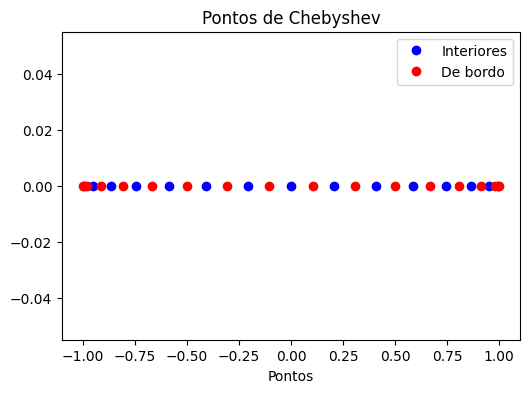

In [31]:
c5_1 = cheby1(15)
c5_2 = cheby2(15)

fig, (ax1) = plt.subplots(ncols=1, figsize=(13,4))

plt.subplot(1,2,1)
plt.plot(c5_1, [0] * len(c5_1), 'bo', label="Interiores")
plt.plot(c5_2, [0] * len(c5_2), 'ro', label="De bordo")

ax1.get_yaxis().set_visible(False)
plt.title("Pontos de Chebyshev")
plt.xlabel('Pontos')
plt.legend()

ax = plt.gca()

In [ ]:
assert len(ax.legend().texts) == 2
assert len(ax.get_title()) >= 10

Explique aqui

Os pontos interiores de Chebyshev ficam todos internos ao intervalo aberto __(-1, 1)__, enquando os pontos de bordo chegam até à fronteira do intervalo fechado __[-1, 1]__.

In [ ]:
ax = None

## Questão 8: Integrando polinômios

Escreva a função que, para um polinômio $P$, dado por seus coeficientes em ordem crescente,
calcula a integral de $P$ no intervalo $[-1,1]$.

In [ ]:
def base_int(p):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert base_int([1,2,3]) == 4

In [ ]:
assert np.isclose(base_int([5,4,3,2,1]), 12.4)

## Questão 9: Integração interpolatória

Escreva uma função que recebe um conjunto $n$ de pontos $x_i$ do intervalo $[-1,1]$,
e calcula pesos $w_i$ tais que

$$ \int_{-1}^1 P(x) \, dx = \sum_{i=1}^n w_i P(x_i) $$

para todos os polinômios $P$ de grau menor do que $n$.

In [ ]:
def pesos(xs):
    xs = np.asarray(xs)
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert np.allclose(pesos([-1, 1]), [1, 1])

In [ ]:
assert np.allclose(pesos([-1, 0, 1]), [1/3, 4/3, 1/3])

O que estes dois primeiros testes verificam?

YOUR ANSWER HERE

In [ ]:
w4 = pesos(cheby1(4))
assert np.allclose(w4, [0.26429774, 0.73570226, 0.73570226, 0.26429774])

## Questão 10: Integrando funções

Vamos usar os mesmos pesos para integrar funções que não são polinômios.

In [ ]:
xs = cheby1(4)
w4 = pesos(xs)

assert 2e-4 <= np.dot(w4, np.cos(xs)) - (np.sin(1) - np.sin(-1)) <= 2e-3
assert 2e-4 <= np.dot(w4, np.exp(xs)) - (np.exp(1) - np.exp(-1)) <= 2e-3

O que estes testes mostram?

YOUR ANSWER HERE

In [ ]:
xs = cheby2(10)
w10 = pesos(xs)

assert np.abs(np.dot(w10, np.cos(xs)) - (np.sin(1) - np.sin(-1))) < 1e-12
assert np.abs(np.dot(w10, np.exp(xs)) - (np.exp(1) - np.exp(-1))) < 1e-12

O que os estes testes mostram, em comparação com os anteriores?
Isso é esperado?

YOUR ANSWER HERE

## Questão 11: Evolução da precisão

Faça um gráfico do erro de integração da função $e^{2x}$ no intervalo $[-1, 1]$
em função do número de pontos de Chebyshev utilizados.

Deve haver duas curvas: uma para os pontos de tipo 1, outra para os pontos de tipo 2.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [ ]:
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) >= 5

O que você percebe quanto à velocidade com que os erros tendem a zero?

YOUR ANSWER HERE

## Questão 12: Integradores

Escreva a função `make_integrator` que recebe `xs`, os pontos $x_i$ no intervalo $[-1,1]$,
e retorna uma função `int_interp(f, a, b, n)` que
- Recebe uma função $f$, um intervalo $[a,b]$ e um número de subdivisões $n$
- Divide o intervalo em $n$ subintervalos de mesmo tamanho
- Calcula a integral de $f$ em cada um destes subintervalos usando pontos correspondentes (por translação e homotetia) aos pontos $x_i$
- E retorna a soma como uma aproximação da integral de $f$ no intervalo $[a,b]$.

In [ ]:
def make_integrator(xs):
    xs = np.asarray(xs, dtype=float)
    ws = pesos(xs)
    def int_interp(f, a, b, n):
        # YOUR CODE HERE
        raise NotImplementedError()

    return int_interp

In [ ]:
f2 = make_integrator([1/2, -1/2])
assert 1e-4 < np.abs(f2(np.exp, 2, 5, 200) - (np.exp(5) - np.exp(2))) < 1e-3

In [ ]:
f5 = make_integrator([0,1/2,-1/2,1,-1])
assert 5e-14 < np.abs(f5(np.exp, 2, 5, 80) - (np.exp(5) - np.exp(2))) < 5e-13

Comente os dois testes acima, e explique porque eles são uma comparação "justa" dos métodos.

YOUR ANSWER HERE

Calcule os erros de integração da função $e^{2x}$ no intervalo $[-1,4]$,
para o método que usa 10 pontos de Chebyshev,
em função do número de subintervalos.

In [ ]:
fcheby = make_integrator(cheby1(10))
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 1

assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) >= 5

Qual a velocidade de convergência deste método?

YOUR ANSWER HERE